# Part 2

## First create function that does simulations for us

In [14]:
sim_CI <- function (y_m, alpha, n, seed_val=123) {
    
    set.seed(seed_val)

    qg025 <- qgamma(0.025,n, n)
    qg975 <- qgamma(0.975,n , n )


    qt975 <- qt(0.975, n-1)


    T = 1000 # number of trials to run


    alpha_hatMLE <- numeric(T)
    alpha_hatMOM <- numeric(T)

    exact.lower <- numeric(T) 
    exact.upper <- numeric(T)

    CLT.lower <- numeric(T)
    CLT.upper <- numeric(T)

    bootMLE.lower <- numeric(T)
    bootMLE.upper <- numeric(T)

    bootMOM.lower <- numeric(T)
    bootMOM.upper <- numeric(T)

    B <- 1000
    bootMLE <- numeric(B)
    bootMOM <- numeric(B)


    for(k in 1:T){


        X <- rexp(n, rate = alpha) # Exp(alpha) random variables
        Y <- y_m * exp(X) # Pareto(y_m, alpha) random variables

        alpha_hatMLE[k] <- 1/ mean(log(Y / y_m)) # MLE formula
        alpha_hatMOM[k] <- mean(Y)/(mean(Y) - y_m)

        exact.lower[k] <- alpha_hatMLE[k] * qg025
        exact.upper[k] <- alpha_hatMLE[k] * qg975 # based on exact MLE CI (part d)

        CLT.lower[k] <- 1/(1/alpha_hatMLE[k] + qt975 * sd(X) / sqrt(n))# based on t distribution CI (part e)
        CLT.upper[k] <- 1/(1/alpha_hatMLE[k] - qt975 * sd(X) / sqrt(n))# based on t distribution CI (part e)



        for(b in 1:B){
            Y_boot <- sample(Y, replace=TRUE)

            bootMLE[b] <- 1/ mean(log(Y_boot / y_m))
            bootMOM[b] <- mean(Y_boot)/(mean(Y_boot) - y_m)

        }


        bootMLE.lower[k] = quantile(bootMLE, 0.025)
        bootMLE.upper[k] = quantile(bootMLE, 0.975)

        bootMOM.lower[k] = quantile(bootMOM, 0.025)
        bootMOM.upper[k] = quantile(bootMOM, 0.975)
        
    }

    writeLines(sprintf('For y_m=%.2f, alpha=%.2f, n=%i\n', y_m, alpha, n))


    rmse_MLE <- sqrt(mean((alpha_hatMLE - alpha)^2))
    rmse_MOM <- sqrt(mean((alpha_hatMOM - alpha)^2))

    writeLines(sprintf('rmse for MLE is %.3f \nrmse for MOM is %.3f\n', rmse_MLE, rmse_MOM))

    coverage_exact <- mean((alpha >= exact.lower) & (alpha <= exact.upper)) # compute for each CI
    coverage_CLT <- mean((alpha >= CLT.lower) & (alpha <= CLT.upper)) 
    coverage_MLE <- mean((alpha >= bootMLE.lower) & (alpha <= bootMLE.upper))
    coverage_MOM <- mean((alpha >= bootMOM.lower) & (alpha <= bootMOM.upper))


    writeLines(sprintf('coverage for ex. is %.3f\ncoverage for CLT is %.3f\ncoverage for MLE is %.3f\ncoverage for MOM is %.3f\n', 
            coverage_exact, coverage_CLT, coverage_MLE, coverage_MOM))


    width_exact <- mean(exact.upper - exact.lower)
    width_CLT <- mean(CLT.upper - CLT.lower)
    width_MLE <- mean(bootMLE.upper - bootMLE.lower)


    writeLines(sprintf('mean interval width for ex. is %.3f\nmean interval width for CLT is %.3f\nmean interval width for MLE is %.3f', width_exact, width_CLT, width_MLE))

}

## Run experiments

In [15]:
sim_CI(y_m=8, alpha=2, n=10)

For y_m=8.00, alpha=2.00, n=10

rmse for MLE is 0.789 
rmse for MOM is 0.844

coverage for ex. is 0.951
coverage for CLT is 0.866
coverage for MLE is 0.867
coverage for MOM is 0.708

mean interval width for ex. is 2.738
mean interval width for CLT is 9.077
mean interval width for MLE is 3.106


In [176]:
sim_CI(y_m=8, alpha=2, n=127)

For y_m=8.00, alpha=2.00, n=127

rmse for MLE is 0.181 
rmse for MOM is 0.216

coverage for ex. is 0.950
coverage for CLT is 0.948
coverage for MLE is 0.945
coverage for MOM is 0.863

mean interval width for ex. is 0.701
mean interval width for CLT is 0.728
mean interval width for MLE is 0.704


In [177]:
sim_CI(y_m=8, alpha=2, n=300)

For y_m=8.00, alpha=2.00, n=300

rmse for MLE is 0.114 
rmse for MOM is 0.155

coverage for ex. is 0.948
coverage for CLT is 0.954
coverage for MLE is 0.946
coverage for MOM is 0.866

mean interval width for ex. is 0.454
mean interval width for CLT is 0.460
mean interval width for MLE is 0.452


In [179]:
sim_CI(y_m=8, alpha=50, n=100)

For y_m=8.00, alpha=50.00, n=100

rmse for MLE is 4.849 
rmse for MOM is 4.846

coverage for ex. is 0.954
coverage for CLT is 0.946
coverage for MLE is 0.950
coverage for MOM is 0.949

mean interval width for ex. is 19.783
mean interval width for CLT is 20.860
mean interval width for MLE is 19.995


In [178]:
sim_CI(y_m=8, alpha=.5, n=100)

For y_m=8.00, alpha=0.50, n=100

rmse for MLE is 0.048 
rmse for MOM is 0.506

coverage for ex. is 0.954
coverage for CLT is 0.946
coverage for MLE is 0.950
coverage for MOM is 0.000

mean interval width for ex. is 0.198
mean interval width for CLT is 0.209
mean interval width for MLE is 0.200


# Estimation of earthquake magnitude distribution

In [1]:
earthquakes <- read.csv('https://people.carleton.edu/~apoppick/ClassData/earthquakes_8greater.csv', header = TRUE)

In [2]:
head(earthquakes)

,Year,Mo,Dy,Location.Name,Latitude,Longitude,Mag
,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1900,10,9,ALASKA: KODIAK ISLAND,57.09,-153.48,8.3
2,1901,8,9,JAPAN: OFF NORTHEAST COAST HONSHU,40.60,142.30,8.2
3,1902,6,11,RUSSIA: SEA OF OKHOTSK,50.00,148.00,8.0
4,1902,9,22,GUAM: AGANA,18.00,146.00,8.1
5,1903,1,4,TONGA ISLANDS,-20.00,-175.00,8.0
6,1903,2,27,INDONESIA: S OF JAVA,-8.00,106.00,8.1


In [3]:
mag <- earthquakes$Mag
mag_min <- 8

n_quakes <- nrow(earthquakes)

In [4]:
qge025 <- qgamma(0.025,n_quakes, n_quakes)
qge975 <- qgamma(0.975,n_quakes, n_quakes)

In [5]:
alphaMLE <- 1/ mean(log(mag / mag_min))

exact.lower <- alphaMLE * qge025
exact.upper <- alphaMLE * qge975 # based on exact MLE CI (part d)

writeLines(sprintf('MLE point estimate for alpha is %.3f\nwith exact 95%%-CI of (%.3f,%.3f)', alphaMLE, exact.lower, exact.upper))

MLE point estimate for alpha is 35.906
with exact 95%-CI of (29.933,42.414)


## Now calculate expected numbr of earthquakes greater than magnitude 9 in given year

In [6]:
e_g8 <- n_quakes/(2023 - 1900 + 1) # expected earthquakes of magnitude greater than 8

e_g9 <- e_g8 * (8/9)^alphaMLE
e_g9.lower <- e_g8 * (8/9)^exact.upper
e_g9.upper <- e_g8 * (8/9)^exact.lower

writeLines(sprintf('point estimate for expected earthquakes of mag. greater than 9 is %.3f\nwith exact 95%%-CI of (%.3f,%.3f)', e_g9, e_g9.lower, e_g9.upper))

point estimate for expected earthquakes of mag. greater than 9 is 0.015
with exact 95%-CI of (0.007,0.030)


In [11]:
library(EnvStats)


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default




Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Earthquakes of Magnitude ≥8 from years 1900 to 2023' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Earthquakes of Magnitude ≥8 from years 1900 to 2023' in 'mbcsToSbcs': dot substituted for <89>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Earthquakes of Magnitude ≥8 from years 1900 to 2023' in 'mbcsToSbcs': dot substituted for <a5>”


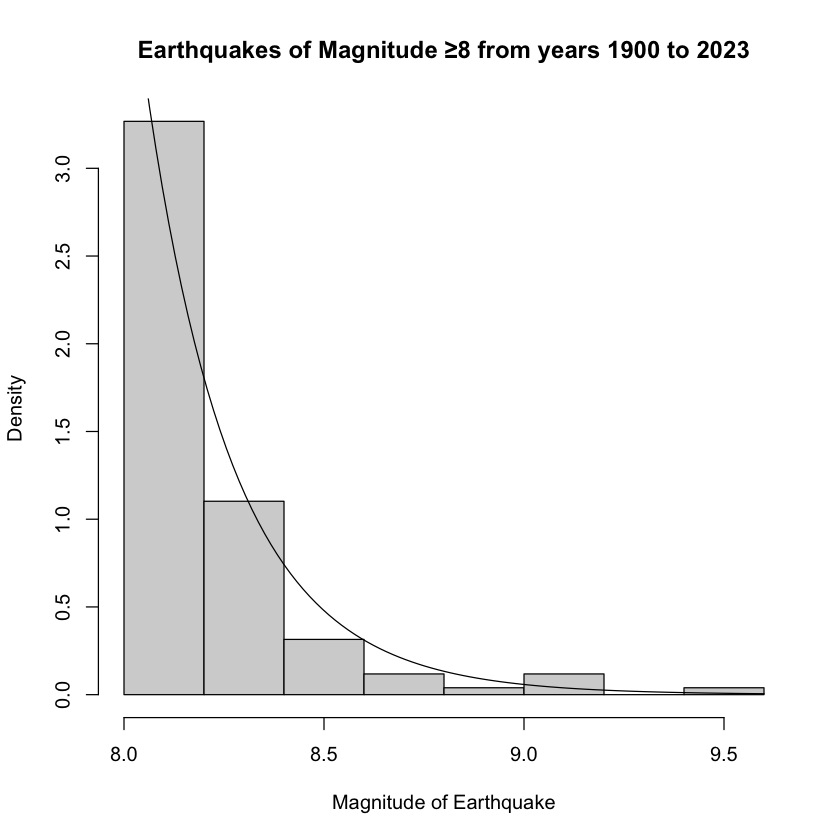

In [22]:
hist(mag, xlab = 'Magnitude of Earthquake',
main = 'Earthquakes of Magnitude ≥8 from years 1900 to 2023', freq=FALSE)
curve(dpareto(x, location = mag_min, shape = alphaMLE), add = TRUE)